# Exercise 1 Autoencoders and Variational Autoencoders

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras import layers

# Split the data into training and testing
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# Normalize values and flatten
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Print the dimensions of the dataset
print('Train: X = ', X_train.shape)
print('Test: X = ', X_test.shape)

Train: X =  (60000, 784)
Test: X =  (10000, 784)


Plain Autoencoders  
Implement different versions of a "plain" auto-encoder with 128 latent dimensions

## a) Model with only fully connected layers

In [2]:
encoding_dim = 128

# Input
input_img = keras.Input(shape=(X_train.shape[1],))
# Encoding
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# Decoding
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# # This is our encoded (32-dimensional) input
# encoded_input = keras.Input(shape=(encoding_dim,))
# # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # Create the decoder model
# decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [3]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
Total params: 201,616
Trainable params: 201,616
Non-trainable params: 0
_________________________________________________________________


In [4]:
n_epochs = 50
batch_size = 256

# Goal: try to reconstruct input
log = autoencoder.fit(x=X_train, 
                y=X_train,
                epochs=n_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 3s 6ms/step - loss: 0.3711 - val_loss: 0.3169
Epoch 2/50
235/235 [==============================] - 1s 6ms/step - loss: 0.3014 - val_loss: 0.2939
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2862 - val_loss: 0.2841
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2793 - val_loss: 0.2792
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2753 - val_loss: 0.2760
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2727 - val_loss: 0.2738
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.2707 - val_loss: 0.2720
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2691 - val_loss: 0.2707
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2680 - val_loss: 0.2697
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2670 - val_loss: 0.2689

313/313 [==============================] - 1s 4ms/step - loss: 0.2626


0.2626497745513916

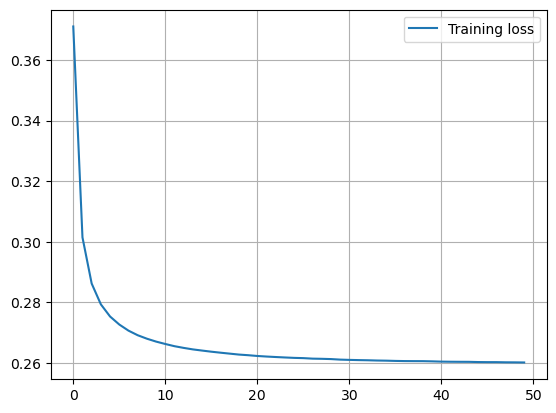

In [38]:
plt.plot(log.history['loss'], label='Training loss')
plt.legend()
plt.grid()
autoencoder.evaluate(x=X_test, y=X_test)

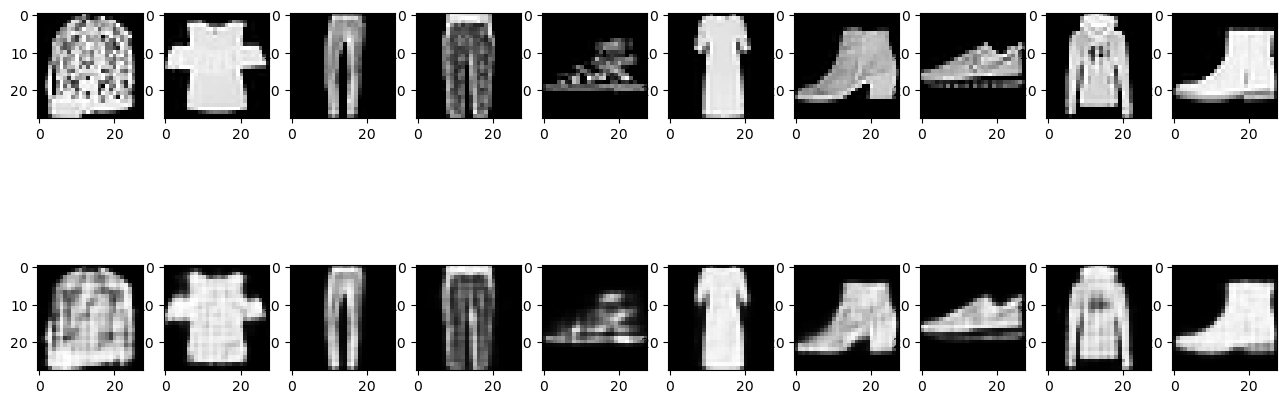

In [39]:
n_img = 10
fig, axs = plt.subplots(nrows=2, ncols=n_img, figsize=(16,6))
X_random = np.random.choice(a=len(X_test), size=n_img)
for loop_idx, img_idx in enumerate(X_random):
    img_orig = X_test[img_idx]
    axs[0, loop_idx].imshow(img_orig.reshape((28,28)), cmap="gray")
    
    #Autoencoded version
    autoencoded_img = autoencoder.predict(img_orig.reshape(1, -1))
    axs[1, loop_idx].imshow(autoencoded_img.reshape((28,28)), cmap="gray")

## b) Model with only CNNs

In [227]:
# Split the data into training and testing
(X_train, _), (X_test, _) = fashion_mnist.load_data()

# Normalize values (NO flatten for CNN)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
print(X_train.shape)
print(X_test.shape)

print("Encoder")
encoder = keras.Sequential()
# encoder.add(keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
encoder.add(keras.layers.Conv2D(filters=16, kernel_size=5, activation="relu"))
encoder.add(keras.layers.Conv2D(filters=32, kernel_size=4, activation="relu", strides=2))
encoder.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", strides=2))
encoder.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", strides=2))
encoder.add(keras.layers.Flatten()) # I didn't manage to make it run in Keras with Flatten() 
# print(encoder.summary())

print("Decoder")
decoder = keras.Sequential()
decoder.add(keras.layers.Reshape(target_shape=(2, 2, 32)))
decoder.add(keras.layers.Conv2DTranspose(filters=32, kernel_size=3, activation="relu", strides=2))
decoder.add(keras.layers.Conv2DTranspose(filters=32, kernel_size=5, activation="relu", strides=2))
decoder.add(keras.layers.Conv2DTranspose(filters=16, kernel_size=4, activation="relu", strides=2))
decoder.add(keras.layers.Conv2D(filters=1, kernel_size=1, activation="sigmoid"))
# print(decoder.summary())

# Plug parts together
autoencoder = keras.Sequential()
autoencoder.add(keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1)))
autoencoder.add(encoder)
autoencoder.add(decoder)

(60000, 28, 28)
(10000, 28, 28)
Encoder
Decoder


In [228]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n_epochs = 50
batch_size = 256

# Goal: try to reconstruct input
log = autoencoder.fit(x=X_train, 
                y=X_train,
                epochs=n_epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test))

Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_167 (Sequential)  (None, 128)              45600     
                                                                 
 sequential_168 (Sequential)  (None, 28, 28, 1)        43105     
                                                                 
Total params: 88,705
Trainable params: 88,705
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.4356 - val_loss: 0.3198
Epoch 2/50
235/235 [==============================] - 3s 14ms/step - loss: 0.3080 - val_loss: 0.3005
Epoch 3/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2943 - val_loss: 0.2936
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.2884 - val_loss: 0.2913
Epoch 5/50
235/235 [====================

313/313 [==============================] - 2s 7ms/step - loss: 0.2665


0.2664993405342102

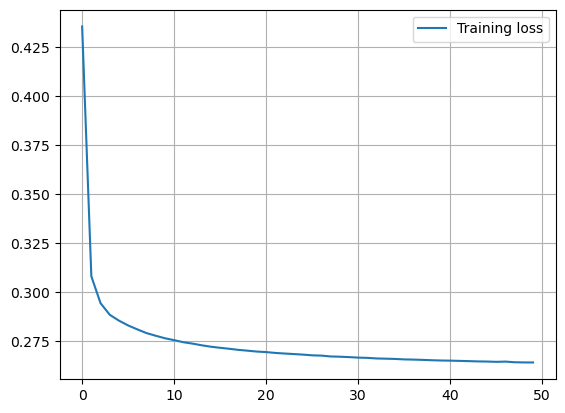

In [229]:
plt.plot(log.history['loss'], label='Training loss')
plt.legend()
plt.grid()
autoencoder.evaluate(x=X_test, y=X_test)

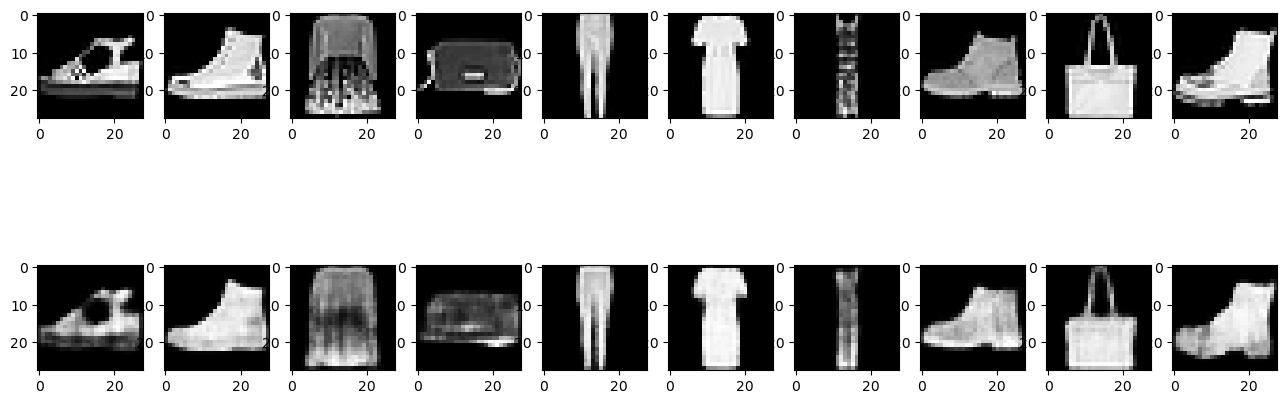

In [230]:
n_img = 10
fig, axs = plt.subplots(nrows=2, ncols=n_img, figsize=(16,6))
for loop_idx, img_idx in enumerate(X_random):
    img_orig = X_test[img_idx]
    axs[0, loop_idx].imshow(img_orig, cmap="gray")
    #Autoencoded version
    autoencoded_img = autoencoder.predict(img_orig.reshape(1, 28, 28))
    axs[1, loop_idx].imshow(autoencoded_img.reshape((28, 28)), cmap="gray")

The two reconstruction errors are almost identical (CNN loss: 0.2665 and MLP loss: 0.2626). The quality of the reconstructed images look quite similar

a) Pick a random image and, by encoding it, map it to the latent space (variable z). Then look at the resulting reconstructions from scaled z-variables, i.e. ~z(t) = t z; t > 0.

(1, 128)


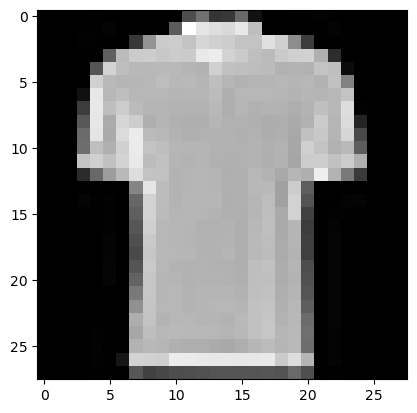

In [232]:
img_orig = X_test[305]
plt.imshow(img_orig, cmap="gray")

img_encoded = encoder.predict(img_orig.reshape(1, 28, 28))
print(img_encoded.shape)

